In [199]:
# IMPORTING LIBRARIES 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [200]:
# READING THE DATA

data = pd.read_pickle("/kaggle/input/reddit-comments-from-subreddits-humour-and-news/redditDataset.pkl")
data.head()

,text,subreddit
0,that sounds like the answer of a man who does ...,humor
1,i always wonder what people get out of reposti...,humor
2,fuck that downvote them for stalking you in t...,humor
3,seeing as how much this has been around and a...,humor
4,it took me a while to even get my legally requ...,humor


In [201]:
def description(data):
    
    print("Shape of data is:", data.shape,"\n")
    print("Further describing the data:")
    desc = pd.DataFrame(index = list(data))
    desc['count'] = data.count()
    desc['null'] = data.isnull().sum()
    desc['type'] = data.dtypes
    desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
    return desc

description(data)

Shape of data is: (100000, 2) 

Further describing the data:


,count,null,type,unique,top,freq
text,100000,0,object,3651,i dropped my headphones on the floor and i m t...,104
subreddit,100000,0,object,2,humor,50000


In [202]:
# CHECKING TYPE OF SUBREDDITS

data['subreddit'].unique()

array(['humor', 'news'], dtype=object)

In [203]:
# RENAMING COLS + TAKING SUBSET OF DATA

def preprocess(data):
    
    data = data.sample(frac = 1) 
    data = data[:50000]
    data = data.rename({'text':'Text','subreddit':'Sentiment'}, axis = 1)
    
    return data

data = preprocess(data)
data.head()

,Text,Sentiment
55507,this is a hit piece each of them was executing...,news
3665,all i see are postit notes all over the house...,humor
90182,oh well let you do business but you just wo n...,news
91804,set automod to disallow new accounts that hel...,news
81797,if this woman changed her vote entirely after ...,news


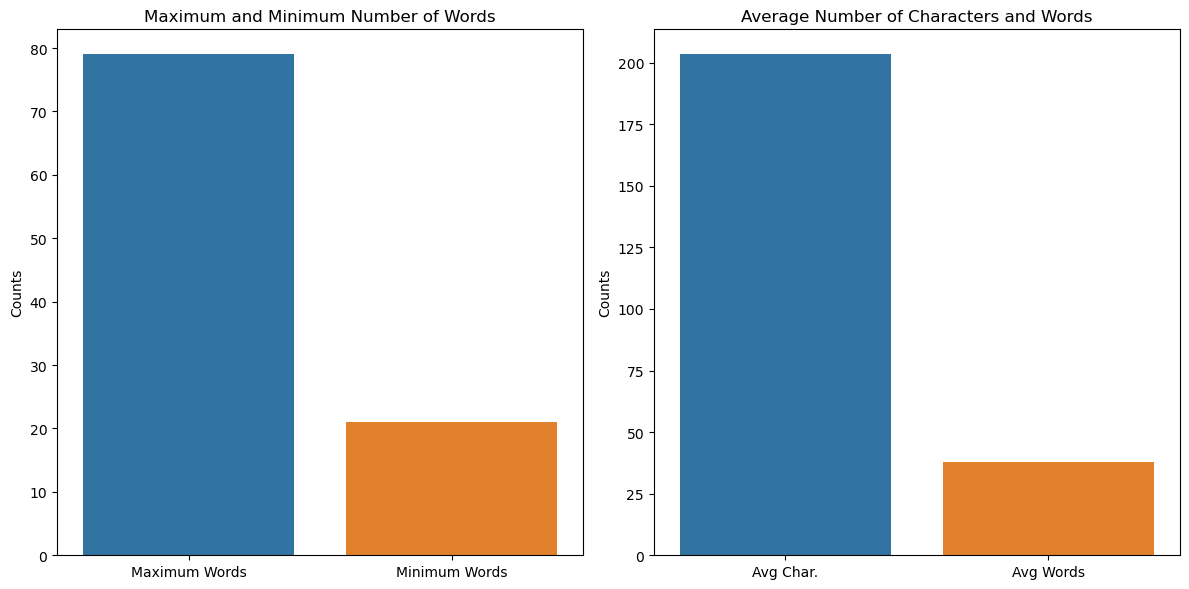

In [204]:
# SHOWING SOME INSIGHTS ABOUT THE TEXT COLUMN

def column_info(data, column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    data['chars'] = data[column].str.len()
    data['words'] = data[column].str.split().str.len()
    
    sns.barplot(x=['Maximum Words', 'Minimum Words'], y=[data['words'].max(), data['words'].min()], ax=axs[0])
    axs[0].set_title('Maximum and Minimum Number of Words')
    axs[0].set_ylabel('Counts')
    
    sns.barplot(x=['Avg Char.', 'Avg Words'], y=[data['chars'].mean(), data['words'].mean()], ax=axs[1])
    axs[1].set_title('Average Number of Characters and Words')
    axs[1].set_ylabel('Counts')
    
    plt.tight_layout()
    plt.show()

column_info(data, 'Text')

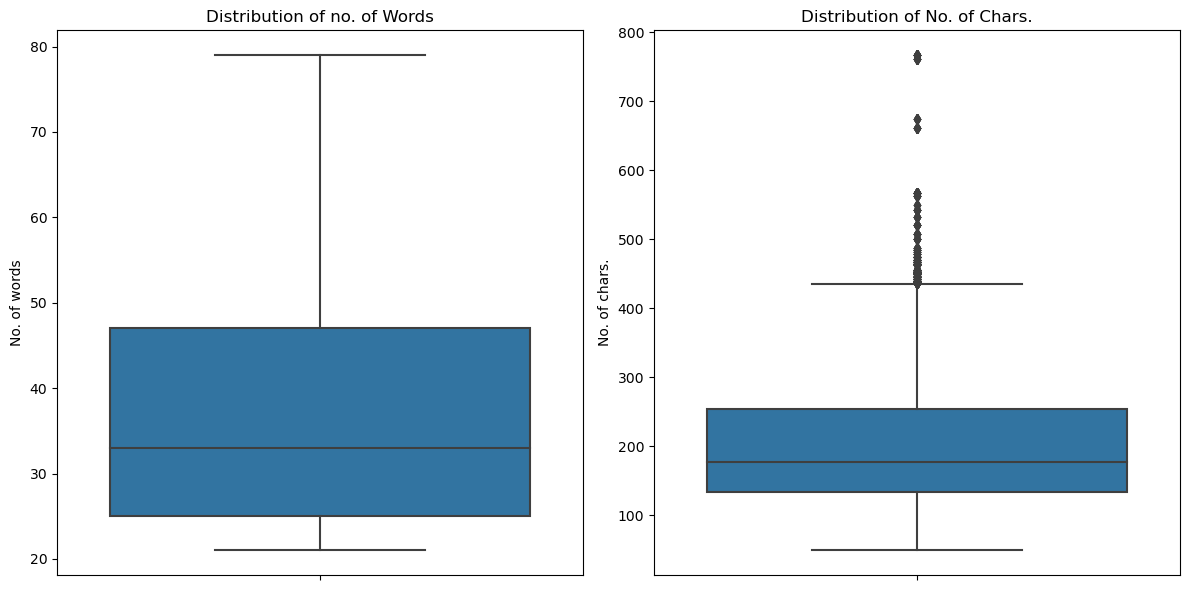

In [205]:
# CHECKING HOW NO. OF WORDS AND CHARACTERS ARE DISTRIBUTED IN TEXT COLUMN

def column_info(data, column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(y=data[column].str.split().str.len(), ax=axs[0])
    axs[0].set_title('Distribution of no. of Words')
    axs[0].set_ylabel('No. of words')

    sns.boxplot(y=data[column].str.len(), ax=axs[1])
    axs[1].set_title('Distribution of No. of Chars.')
    axs[1].set_ylabel('No. of chars.')

    plt.tight_layout()
    plt.show()

column_info(data, 'Text')

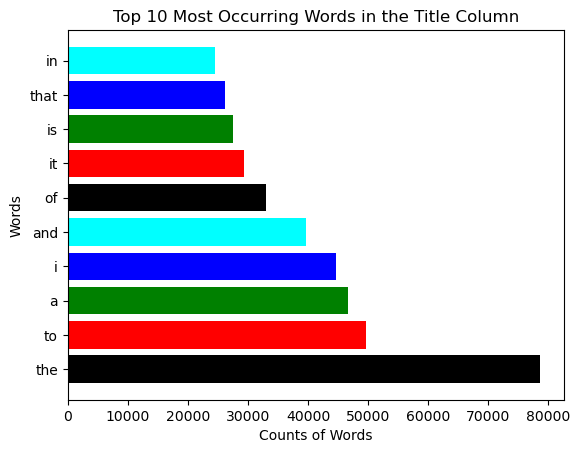

In [206]:
# GETTING TOP 10 MOST OCCURING WORDS BEFORE PREPROCESSING OF THE TEXT

import matplotlib.pyplot as plt
from collections import Counter

def most_occuring_words(data, column):
    words = []
    word = []
    count = []
    
    for i in data[column]:
        for j in i.split():
            words.append(j)
    
    counter = Counter(words)
    top_words = counter.most_common(10)
    
    for i, j in top_words:
        word.append(i)
        count.append(j)
    
    plt.barh(word, count, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.title("Top 10 Most Occurring Words in the Title Column")
    plt.xlabel("Counts of Words")
    plt.ylabel("Words")

most_occuring_words(data, 'Text')

In [207]:
# INSTALLING WORDCLOUD

!pip install wordcloud

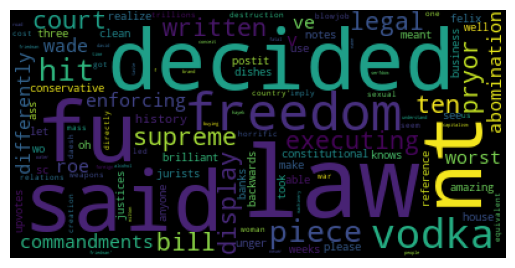

<Figure size 4000x4000 with 0 Axes>

In [208]:
# CEATE WORDCLOUD PRIOR TO PREPROCESSING STEPS TO SEE MOST OCCURING WORDS

from wordcloud import WordCloud

def create_wordcloud(data, column):
    words = data[column].values 
    wordcloud = WordCloud().generate(str(words))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.figure(figsize = (40,40), facecolor = None)

create_wordcloud(data, 'Text')

# TEXT PREPARATION

In [209]:
# DOWNLOADING LIBRARIES NEEDED FOR TEXT PREPROCESSING

!pip install textacy
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [210]:
# IMPORTING ALL NECESSARY LIBRARIES

import emoji
from textacy import preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [211]:
# REMOVING STOPWORDS FROM TWEETS, LOWERING TEXT AND REMOVING EMOJIS

stop = stopwords.words('english')
data["Text"] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data["Text"] = data["Text"].str.lower()

data["Text"] = data["Text"].apply(lambda x: emoji.demojize(x))
data.drop(['chars', 'words'], axis = 1, inplace = True)
data.head()

,Text,Sentiment
55507,hit piece executing laws written decided supre...,news
3665,see postit notes house please clean dishes fu ...,humor
90182,oh well let business wo nt able use banks back...,news
91804,set automod disallow new accounts helps author...,news
81797,woman changed vote entirely watching facebook ...,news


In [212]:
# REMOVING PUNCTUATION, EXTRA WHITESPACE AND STEMMING THE WORDS

preproc = preprocessing.make_pipeline(
    
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
    preprocessing.remove.html_tags
    
 )

data["Text"] = data["Text"].apply(preproc)

stemmer = SnowballStemmer("english")
data['Text'] = data['Text'].apply(lambda x: stemmer.stem(x))

data.head()

,Text,Sentiment
55507,hit piece executing laws written decided supre...,news
3665,see postit notes house please clean dishes fu ...,humor
90182,oh well let business wo nt able use banks back...,news
91804,set automod disallow new accounts helps author...,news
81797,woman changed vote entirely watching facebook ...,news


In [213]:
# SEPERATING INTO DEPENDENT AND INDEPENDENT VARIABLES

x = data[["Text"]]
y = data["Sentiment"]

x.head()

,Text
55507,hit piece executing laws written decided supre...
3665,see postit notes house please clean dishes fu ...
90182,oh well let business wo nt able use banks back...
91804,set automod disallow new accounts helps author...
81797,woman changed vote entirely watching facebook ...


**TEXT VECTORIZATION**

**Word2Vec Embeddings**

In [214]:
# CREATING AN INSTANCE OF WORD2VEC

import gensim
from gensim.models import Word2Vec
    
tokenized_text = [sentence.split() for sentence in data['Text']]
model_w2v = Word2Vec(tokenized_text, window=5, min_count=1, workers=4)

In [215]:
# CHECKING OUR WORD2VEC MODEL

model_w2v.wv.most_similar("yes")

[('ah', 0.6365468502044678),
 ('coliostis', 0.6343903541564941),
 ('attorneys', 0.6245574951171875),
 ('kudos', 0.6062719821929932),
 ('whiners', 0.5828297138214111),
 ('frontpage', 0.5739147067070007),
 ('boomer', 0.5721012353897095),
 ('forpus', 0.5650898218154907),
 ('highquality', 0.5521327257156372),
 ('spew', 0.5514571070671082)]

In [216]:
# CHECKING DIMENSION OF VECTOR OF THE WORDS AS CREATED BY MODEL

len(model_w2v.wv['food'])

100

In [217]:
# TAKING MEAN OF ALL VECTORS PRESENT IN WORD2VEC

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

In [218]:
# PREPARING THE FEATURE SET FOR WORD2VEC

wordvec_arrays = np.zeros((len(tokenized_text), 100)) 
for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 100)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(50000, 100)

In [219]:
wordvec_arrays.shape

(50000, 100)

In [220]:
# CREATING X_TRAIN, X_TEST BASED ON W2VEC EMBEDDINGS

x_train_w2v = wordvec_arrays[:40000,:]
x_test_w2v = wordvec_arrays[40000: ,:] 

In [221]:
# SEPERATIGN OUT Y VARIBALES AS WELL

y_train = y[:40000]
y_test = y[40000:]

**DOC2VEC EMBEDDINGS**

In [222]:
# IMPORTING LIBRARIES NEEDED FOR DOC2VEC EMBEDDINGS

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar")

In [223]:
# ADDING TAGS TO THE DOCUMENTS

from gensim.models.doc2vec import TaggedDocument

def add_tag(twt):
    output = []
    for i, s in enumerate(twt):
        output.append(TaggedDocument(words=s, tags=["reddit_" + str(i)]))
    return output

tokenized_text = [sentence.split() for sentence in data['Text']]
documents = add_tag(tokenized_text) 

In [224]:
# CHECKING A TAGGED DOCUMENT

documents[0]

TaggedDocument(words=['hit', 'piece', 'executing', 'laws', 'written', 'decided', 'supreme', 'court', 'bill', 'pryor', 'said', 'legal', 'display', 'ten', 'commandments', 'would', 'decided', 'differently', 'enforcing', 'law', 'also', 'said', 'roe', 'v', 'wade', 'worst', 'abomination', 'history', 'constitutional', 'law', 'brilliant', 'conservative', 'jurists', 'would', 'make', 'amazing', 'sc', 'justic'], tags=['reddit_0'])

In [225]:
# CREATING INSTANCE FOR DOC2VEC

model_d2v = gensim.models.Doc2Vec(dm=1, 
                                  dm_mean=1, 
                                  window=5,                                
                                  negative=7, 
                                  min_count=5,                                   
                                  workers=32,                                   
                                  alpha=0.1,                                  
                                 ) 

In [226]:
# BUILDING THE VOCAB

model_d2v.build_vocab([i for i in tqdm(documents)])

100%|██████████| 50000/50000 [00:00<00:00, 1371162.56it/s]


In [227]:
# TRAINING DOC2VEC ON OUR VOCAB

model_d2v.train(documents, total_examples= len(x['Text']), epochs=2)

In [228]:
# CREATING FEATURE SET FOR DEC2VEC

docvec_arrays = np.zeros((len(tokenized_text), 100))

for i in range(len(x)):
    docvec_arrays[i,:] = model_d2v.dv[i].reshape((1,100))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(50000, 100)

In [229]:
# SEPERATING OUT DOC2VEC EMBEDDINGS INTO TRAIN AND TEST

x_train_d2v = docvec_df.iloc[:40000]
x_test_d2v = docvec_df.iloc[40000:]

In [230]:
# ENCODING THE Y VARIABLE

y_train = y_train.replace({"humor":1, "news":0})
y_test = y_test.replace({"humor":1, "news":0})

 **FITTING MACHINE LEARNING MODELS**

**FITTING XGBOOST FOR WORD2VEC AND DOC2VEC**

In [231]:
# GETTING THE BEST HYPERPARAMETERS FOR XGBOOST FOR W2VEC EMBEDDINGS

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 4],
    'n_estimators': [100, 200]
}

xgb_model = XGBClassifier()

grid_search_xgb_w2v = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search_xgb_w2v.fit(x_train_w2v, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [232]:
# FITTING AN XGBOOST FOR THE WORD2VEC EMBEDDINGS WITH THE BEST PARAMETERS

best_params = grid_search_xgb_w2v.best_params_
xgb_model_w2v = XGBClassifier(**best_params)
xgb_model_w2v.fit(x_train_w2v, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [233]:
# MAKING PREDICTIONS WITH XGBOOST FOR THE WORD2VEC EMBEDDINGS

xgb_preds_w2v = xgb_model_w2v.predict(x_test_w2v)

In [234]:
# FINDING BEST HYPERPARAMETERS FOR XGBOOST USING DOC2VEC EMBEDDINGS

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 4],
    'n_estimators': [100, 200]
}

xgb_model = XGBClassifier()

grid_search_xgb_d2v = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search_xgb_d2v.fit(x_train_d2v, y_train)

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [235]:
# FITTING AN XGBOOST FOR THE DOC2VEC EMBEDDINGS WITH THE BEST PARAMETERS

best_params = grid_search_xgb_d2v.best_params_
xgb_model_d2v = XGBClassifier(**best_params)
xgb_model_d2v.fit(x_train_d2v, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [236]:
# MAKING PREDICTIONS WITH XGBOOST FOR THE DOC2VEC EMBEDDINGS

xgb_preds_d2v = xgb_model_d2v.predict(x_test_d2v)

**EVALUATING OUR MODELS**

In [245]:
# CHECKING ACCURACY SCORES FOR OUR MODELS

from sklearn.metrics import accuracy_score

print("Accuracy Score for XGBOOST for Word2vec Model is:", accuracy_score(y_test, xgb_preds_w2v))
print("Accuracy Score for XGBOOST for Doc2vec Model is:", accuracy_score(y_test, xgb_preds_d2v))
print('\n')

Accuracy Score for XGBOOST for Word2vec Model is: 0.9998
Accuracy Score for XGBOOST for Doc2vec Model is: 0.6976




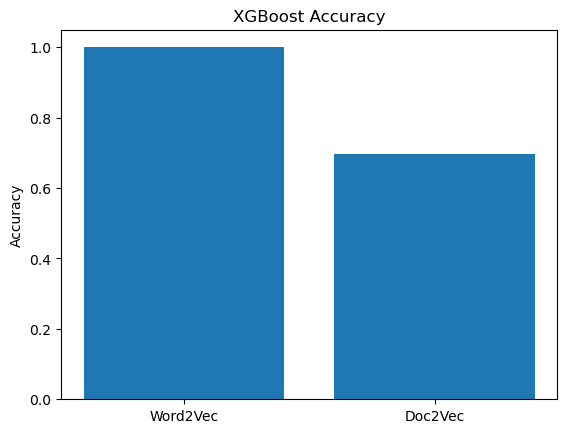

In [247]:
# PLOTTING BAR PLOTS TO COMPARE PREDICTIONS BETWEEN WORD2VEC AND DOC2VEC

xgb_accuracy_w2v = accuracy_score(y_test, xgb_preds_w2v)
xgb_accuracy_d2v = accuracy_score(y_test, xgb_preds_d2v)

plt.bar(['Word2Vec', 'Doc2Vec'], [xgb_accuracy_w2v, xgb_accuracy_d2v])
plt.title('XGBoost Accuracy')
plt.ylabel('Accuracy')
plt.show()